### Dawson Pallotta

# Update filename and headers

and add markdown cell explanations and in-code comments as needed

In [2]:
!pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 125.4/125.4 MB 6.2 MB/s eta 0:00:00


In [3]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [31]:
#reading and printing the dataset
df = pd.read_csv("C:/Users/student/Data Minning/featuresDefault.csv") #features for the Moodable/EMU dataset
print(df.shape)
df.head(200)

(114, 199)


,id,phq9,NumTexts,help,office,dance,money,wedding,domestic_work,sleep,...,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,colors,text_abbreviations
0,e122,7,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,e1526,20,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,e2806,6,142,0.000000,0.006337,0.003802,0.011407,0.000000,0.003802,0.003802,...,0.0,0.00000,0.003802,0.000000,0.001267,0.002535,0.001267,0.001267,0.002535,0.001267
3,e3702,0,58,0.013413,0.005961,0.000000,0.000000,0.007452,0.008942,0.004471,...,0.0,0.00149,0.017884,0.001490,0.013413,0.000000,0.016393,0.000000,0.000000,0.000000
4,e433,15,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,m9751,14,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
110,m9886,9,60,0.042010,0.002471,0.000000,0.000000,0.033773,0.024712,0.023888,...,0.0,0.00000,0.007414,0.004942,0.000000,0.000000,0.064250,0.000000,0.000000,0.034596
111,m9928,14,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112,m9968,13,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


df.shape = (rows, columns)

How many participants are in the dataset?  114

How many features are in the dataset?  199

How does this compare to the number of participants and features in the DepreST-CAT dataset? This is deffinitly more condensened as this has 114 participants while the DepreST-CAT dataset has 369 participants.

In [32]:
#sets the split for the data based for who tests positive for depression
split = 15
data = df[:]
d10 = []
for i in range(0, data.shape[0]):
    if int(data.phq9[i]) >= split:
        d10.append(1)
    else:
        d10.append(0)
data["phq9"] = d10

#checking values
print(sum(d10)/len(d10))
print(len(d10))

0.37719298245614036
114


How many participants screened positive for depression at split 15?
114

## Machine learning code with comments added for you

In [33]:
#sets the models for calculating the values in the confusion matrix
#reading about python def https://www.w3schools.com/python/ref_keyword_def.asp

def get_ba(x,y,z,q):
    #fit model and make predictions
    clf.fit(x, list(y))
    y_pred = clf.predict(z)

    #evaluate model - testing
    conf_mat = confusion_matrix(list(q), y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    ba = (sens + spec)/2
    return ba

In [34]:
#44 seconds
#creates the training and testing sets for the data 
#numberOfFeatures = 2 #set number of principal components
modelTypelist = ["Ada", "XGB", "RFg", "RFe", "dte", "dtg"]

train_ba_depression = []
test_ba_depression = []
rlist = []
mlist = []

for modelType in modelTypelist: 
    for r in range(50, 75):
        rlist.append(r)
        mlist.append(modelType)

        #create train/test sets
        df_train, df_test = train_test_split(data, test_size=0.3, stratify=data[["phq9"]], random_state = r)

        #save target variables
        train_targets = df_train.loc[:,["phq9"]]
        test_targets = df_test.loc[:,["phq9"]]

        #drop non-features: id and targets
        trainContent = df_train.drop(columns = ["id", "phq9"])
        testContent = df_test.drop(columns = ["id", "phq9"])

        #normalize before pca
        min_max_scaler = preprocessing.MinMaxScaler()  
        np_scaled = min_max_scaler.fit_transform(trainContent)
        featureSubset = pd.DataFrame(np_scaled)
        np_scaled2 =  min_max_scaler.transform(testContent)
        testSubset = pd.DataFrame(np_scaled2)

        #principal component analysis
        #pca = PCA(n_components=numberOfFeatures)
        #pca = pca.fit(featureSubset)
        #X_pca = pca.transform(featureSubset)
        #pcaDF = pd.DataFrame(X_pca)
        #testSubset2 = pca.transform(testSubset)
        #pca_test = pd.DataFrame(testSubset2)
        
        #upsampling to balance classes
        train_targets = train_targets.reset_index(drop = True)
        DF_labels = pd.concat([featureSubset,train_targets], axis = 1) #reattach labels

        phq0 = DF_labels[DF_labels.phq9 == 0]
        phq1 = DF_labels[DF_labels.phq9 == 1]
        if phq0.shape[0]>phq1.shape[0]:
            phq_upsampled = resample(phq1, n_samples=(phq0.shape[0]-phq1.shape[0]), random_state=50)
            phq_up = pd.concat([DF_labels, phq_upsampled])
        elif phq0.shape[0]<phq1.shape[0]:
            phq_upsampled = resample(phq0, n_samples=(phq1.shape[0]-phq0.shape[0]), random_state=50)
            phq_up = pd.concat([DF_labels, phq_upsampled])

        #remove upsampled labels
        phq_targets = phq_up.loc[:,["phq9"]]
        phq_features = phq_up.drop(columns = ["phq9"])

        #select modeltype
        if modelType == "Ada":
            clf = AdaBoostClassifier(random_state=r)
        elif modelType == "XGB":
            clf = xgb.XGBClassifier(max_depth=3, random_state=r)
        elif modelType == "RFg":
            clf = RandomForestClassifier(criterion="gini", max_depth=3, random_state=r)
        elif modelType == "RFe":
            clf = RandomForestClassifier(criterion="entropy", max_depth=3, random_state=r)
        elif modelType == "dtg":
            clf = tree.DecisionTreeClassifier(criterion='gini', random_state = r, max_depth=3)
        elif modelType == "dte":
            clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = r, max_depth=3)
        
        #train evaluate models
        ba = get_ba(phq_features, phq_targets["phq9"], testSubset, test_targets["phq9"])
        test_ba_depression.append(ba)
        
        ba = get_ba(phq_features, phq_targets["phq9"], phq_features, phq_targets["phq9"])
        train_ba_depression.append(ba)
                
resultsDF = pd.DataFrame()
resultsDF["train_ba"] = train_ba_depression
resultsDF["test_ba"] = test_ba_depression
resultsDF["random"] = rlist
resultsDF["model"] = mlist
resultsDF.head()

,train_ba,test_ba,random,model
0,0.989796,0.618881,50,Ada
1,1.000000,0.533217,51,Ada
2,0.989796,0.678322,52,Ada
3,0.979592,0.617133,53,Ada
4,1.000000,0.548951,54,Ada


Which step in the above code is commented out? Why would we comment out this step when working with tree-based methods? (The answer is in 1.11.4.9. of https://scikit-learn.org/stable/modules/ensemble.html#forest). The piece that is commented out is the prinicpal component analysis. It takes it out because when using a tree-based method it needs all of the features so that you are able to see which ones are important and which ones are irelevant, so that th e apporpriate split can be ustilized.


What is the depth of the trees we are using for the majority of classifiers in this lab? What criterion are we comparing? The depth of the  trees that are being used for most of the classifieres is 3, and the criterion that we are comparing is gini and entropy.

## Plotting

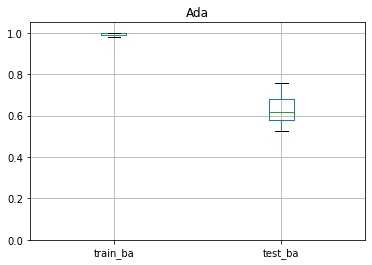

0.63 +- 0.06


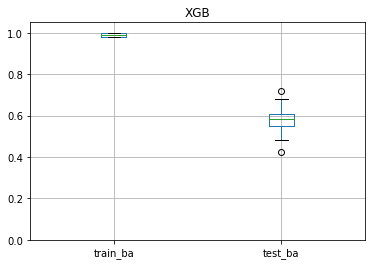

0.58 +- 0.06


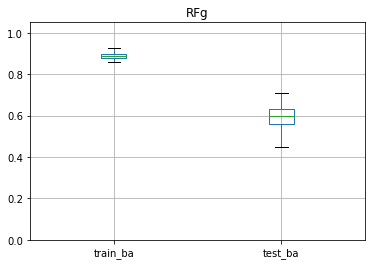

0.59 +- 0.06


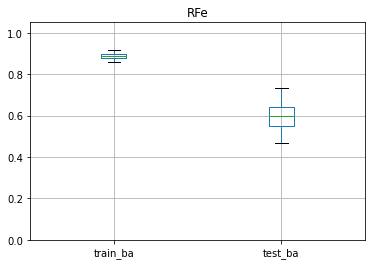

0.6 +- 0.07


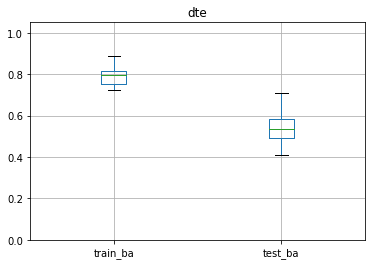

0.54 +- 0.07


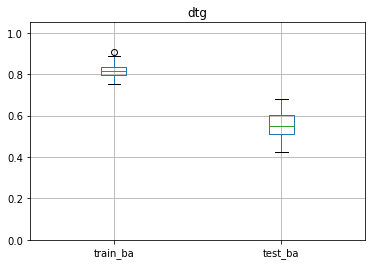

0.55 +- 0.06


In [35]:
#plots the models from the information gatherd from the code above 
for modelType in modelTypelist: 
    tempDF = resultsDF[resultsDF.model == modelType]
    tempDF.boxplot(['train_ba','test_ba'])
    plt.title(modelType)
    plt.ylim(0, 1.05)
    plt.show()
    plt.close()
    print(str(round(np.mean(tempDF["test_ba"]),2)) + " +- " + str(round(np.std(tempDF["test_ba"]),2)))

Which model has the highest balanced accuracy? The lowest?
The model with the highest balanced accuracy is ADA with .63 and the lowest is dte with a balanced accuracy of .54
Which model has the lowest standard deviation? The highest?
The model with the lowest standard deviation is Ada, XGB, RFg, and dtg with the value of .06, and the highest is RFe and dte with the value of .07.
For the two prior responses, is this what is expected for decision tree and tree ensembles? Explain.
It is what I expected because of how complex the random forest is I expected it to be around where these are and while they do have a large standard deviations I think the fact that they don't have outliers shows the complexity
What impact does the criterion have on the performance of the decision trees and random forests?
I think that the crteria had an impact on the standard deviations in the dataset

# Part 2

Repeat the lab below this cell with the BOW.csv. 

In addition to the other questions, then answer the following: 
* Compare the number of features. Compare the amount of time it takes for the machine learning code to run. What does this indicate?
For the default dataset it took 44 seconds to run the code for the machining learning, and for the BOW dataset it took 5 minutes and 25 seconds. This could indicate that the data from the BOW dataset much denser and harder for the machine learning to get through for training and testing than the default dataset.
* Which set of features was more effective at depression screening? Why do you think this is? Explain.
the first set of features seemed to work better as they had less standard deviation
* Make a suggestion about something that could be changed to improve screening. Explain
Using a more specific split and better number of features to reduce the standard deviations.

In [40]:
#reads the dataset csv
df = pd.read_csv("C:/Users/student/Data Minning/BOW.csv") #features for the Moodable/EMU dataset
print(df.shape)
df.head(200)

(114, 6251)


,id,phq9,NumTexts,a12179c,a26m,a26w,aa,aaaaaaand,aaaaw,aaapo,...,zeke,zero,zerodha,zillow,zindegi,zoey,zone,zones,zoology,zuri
0,e122,7,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e1526,20,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,e2806,6,142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,e3702,0,58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,e433,15,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,m9751,14,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,m9886,9,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,m9928,14,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,m9968,13,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#sets the split information for the dataset
split = 15
data = df[:]
d10 = []
for i in range(0, data.shape[0]):
    if int(data.phq9[i]) >= split:
        d10.append(1)
    else:
        d10.append(0)
data["phq9"] = d10

#checking values
print(sum(d10)/len(d10))
print(len(d10))

0.37719298245614036
114


How many participants screened positive for depression at split 15?
114

In [42]:
#reading about python def https://www.w3schools.com/python/ref_keyword_def.asp
#sets the calculations for the confusion matrix
def get_ba(x,y,z,q):
    #fit model and make predictions
    clf.fit(x, list(y))
    y_pred = clf.predict(z)

    #evaluate model - testing
    conf_mat = confusion_matrix(list(q), y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    ba = (sens + spec)/2
    return ba

In [43]:
#sets the training data 
#5 minutes 25 seconds 
#numberOfFeatures = 2 #set number of principal components
modelTypelist = ["Ada", "XGB", "RFg", "RFe", "dte", "dtg"]

train_ba_depression = []
test_ba_depression = []
rlist = []
mlist = []

for modelType in modelTypelist: 
    for r in range(50, 75):
        rlist.append(r)
        mlist.append(modelType)

        #create train/test sets
        df_train, df_test = train_test_split(data, test_size=0.3, stratify=data[["phq9"]], random_state = r)

        #save target variables
        train_targets = df_train.loc[:,["phq9"]]
        test_targets = df_test.loc[:,["phq9"]]

        #drop non-features: id and targets
        trainContent = df_train.drop(columns = ["id", "phq9"])
        testContent = df_test.drop(columns = ["id", "phq9"])

        #normalize before pca
        min_max_scaler = preprocessing.MinMaxScaler()  
        np_scaled = min_max_scaler.fit_transform(trainContent)
        featureSubset = pd.DataFrame(np_scaled)
        np_scaled2 =  min_max_scaler.transform(testContent)
        testSubset = pd.DataFrame(np_scaled2)

        #principal component analysis
        #pca = PCA(n_components=numberOfFeatures)
        #pca = pca.fit(featureSubset)
        #X_pca = pca.transform(featureSubset)
        #pcaDF = pd.DataFrame(X_pca)
        #testSubset2 = pca.transform(testSubset)
        #pca_test = pd.DataFrame(testSubset2)
        
        #upsampling to balance classes
        train_targets = train_targets.reset_index(drop = True)
        DF_labels = pd.concat([featureSubset,train_targets], axis = 1) #reattach labels

        phq0 = DF_labels[DF_labels.phq9 == 0]
        phq1 = DF_labels[DF_labels.phq9 == 1]
        if phq0.shape[0]>phq1.shape[0]:
            phq_upsampled = resample(phq1, n_samples=(phq0.shape[0]-phq1.shape[0]), random_state=50)
            phq_up = pd.concat([DF_labels, phq_upsampled])
        elif phq0.shape[0]<phq1.shape[0]:
            phq_upsampled = resample(phq0, n_samples=(phq1.shape[0]-phq0.shape[0]), random_state=50)
            phq_up = pd.concat([DF_labels, phq_upsampled])

        #remove upsampled labels
        phq_targets = phq_up.loc[:,["phq9"]]
        phq_features = phq_up.drop(columns = ["phq9"])

        #select modeltype
        if modelType == "Ada":
            clf = AdaBoostClassifier(random_state=r)
        elif modelType == "XGB":
            clf = xgb.XGBClassifier(max_depth=3, random_state=r)
        elif modelType == "RFg":
            clf = RandomForestClassifier(criterion="gini", max_depth=3, random_state=r)
        elif modelType == "RFe":
            clf = RandomForestClassifier(criterion="entropy", max_depth=3, random_state=r)
        elif modelType == "dtg":
            clf = tree.DecisionTreeClassifier(criterion='gini', random_state = r, max_depth=3)
        elif modelType == "dte":
            clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = r, max_depth=3)
        
        #train evaluate models
        ba = get_ba(phq_features, phq_targets["phq9"], testSubset, test_targets["phq9"])
        test_ba_depression.append(ba)
        
        ba = get_ba(phq_features, phq_targets["phq9"], phq_features, phq_targets["phq9"])
        train_ba_depression.append(ba)
                
resultsDF = pd.DataFrame()
resultsDF["train_ba"] = train_ba_depression
resultsDF["test_ba"] = test_ba_depression
resultsDF["random"] = rlist
resultsDF["model"] = mlist
resultsDF.head()

,train_ba,test_ba,random,model
0,1.0,0.562937,50,Ada
1,1.0,0.555944,51,Ada
2,1.0,0.526224,52,Ada
3,1.0,0.508741,53,Ada
4,1.0,0.419580,54,Ada


Which step in the above code is commented out? Why would we comment out this step when working with tree-based methods? (The answer is in 1.11.4.9. of https://scikit-learn.org/stable/modules/ensemble.html#forest). The piece that is commented out is the prinicpal component analysis. It takes it out because when using a tree-based method it needs all of the features so that you are able to see which ones are important and which ones are irelevant, so that th e apporpriate split can be ustilized.

What is the depth of the trees we are using for the majority of classifiers in this lab? What criterion are we comparing? The depth of the  trees that are being used for most of the classifieres is 3, and the criterion that we are comparing is gini and entropy.

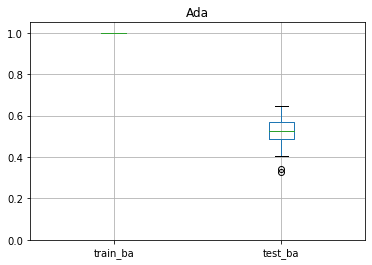

0.52 +- 0.08


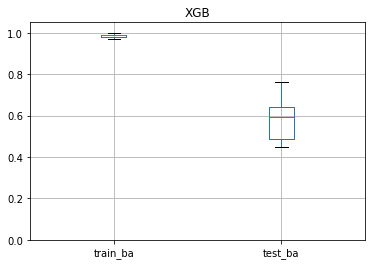

0.58 +- 0.09


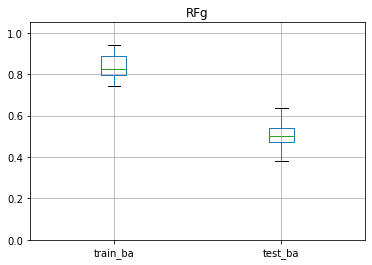

0.51 +- 0.06


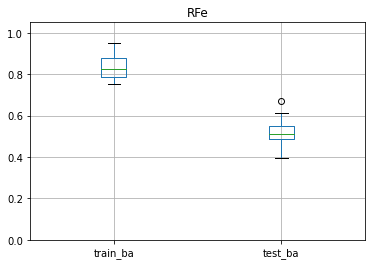

0.52 +- 0.07


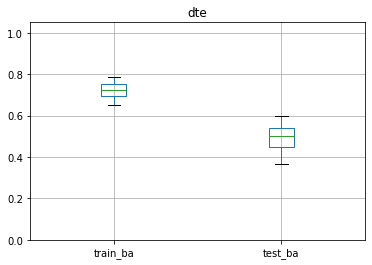

0.5 +- 0.06


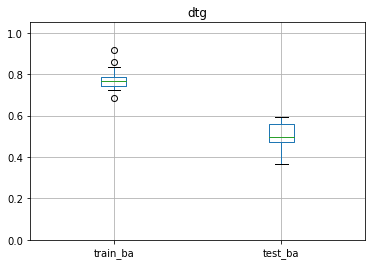

0.5 +- 0.06


In [13]:
#sets the plots 
for modelType in modelTypelist: 
    tempDF = resultsDF[resultsDF.model == modelType]
    tempDF.boxplot(['train_ba','test_ba'])
    plt.title(modelType)
    plt.ylim(0, 1.05)
    plt.show()
    plt.close()
    print(str(round(np.mean(tempDF["test_ba"]),2)) + " +- " + str(round(np.std(tempDF["test_ba"]),2)))

Which model has the highest balanced accuracy? The lowest?
The model with the highest balanced accuracy is XGB with .58 and the lowest is dtg and dte with a balanced accuracy of .5
Which model has the lowest standard deviation? The highest?
The model with the lowest standard deviation is RFg, dte, and dtg with the value of .06, and the highest is XGB with the value of .09.
For the two prior responses, is this what is expected for decision tree and tree ensembles? Explain.
It is not what I expected because of how complex the random forest is I expected it to be more exact and not have outliers
What impact does the criterion have on the performance of the decision trees and random forests?
I belive that they did have some impact on the outliers that are worked into the data set